<a href="https://colab.research.google.com/github/kinome79/Colaborator/blob/main/Copy_of_fcc_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [73]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

--2023-02-26 06:50:41--  https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70702765 (67M) [application/zip]
Saving to: ‘cats_and_dogs.zip.1’

cats_and_dogs.zip.1 100%[===================>]  67.43M  44.8MB/s    in 1.5s    

2023-02-26 06:50:43 (44.8 MB/s) - ‘cats_and_dogs.zip.1’ saved [70702765/70702765]

Archive:  cats_and_dogs.zip
replace cats_and_dogs/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/cats_and_dogs/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
  inflating: cats_and_dogs/test/48.jpg  
replace __MACOSX/cats_and_dogs/test/._48.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
  inflating: cats_and_dogs/test/49.jpg  
  inflating: cats_and_dogs/test/.DS_Store  
  inflating: cats_and_dogs/

In [74]:
# 3
train_image_generator = ImageDataGenerator(rescale = 1./255)
validation_image_generator = ImageDataGenerator(rescale = 1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
    'cats_and_dogs/train',
    batch_size = batch_size,
    shuffle = True,
    target_size = (IMG_WIDTH, IMG_HEIGHT),
    class_mode = 'binary',
    )
val_data_gen = validation_image_generator.flow_from_directory(
    'cats_and_dogs/validation',
    batch_size = batch_size, 
    shuffle = True, 
    target_size = (IMG_WIDTH, IMG_HEIGHT), 
    class_mode = 'binary')
test_data_gen = test_image_generator.flow_from_directory(
    'cats_and_dogs/test',
    batch_size = batch_size,
    shuffle = False,
    target_size = (IMG_WIDTH, IMG_HEIGHT),
    class_mode = None)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


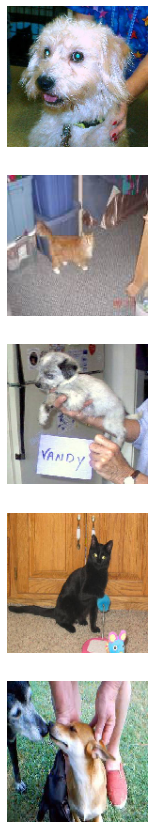

In [75]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [76]:
# 5
train_image_generator = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True, 
    rotation_range = 35, 
    width_shift_range = 0.2, 
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2
)


Found 2000 images belonging to 2 classes.


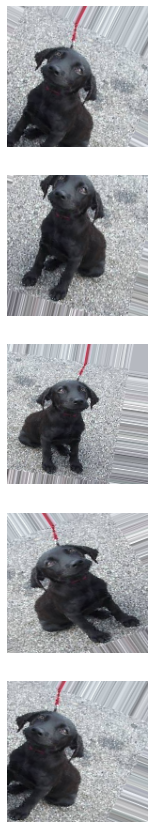

In [77]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [78]:
# 7
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam', 
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
    metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 34, 34, 32)        9248      
                                                                 
 flatten_7 (Flatten)         (None, 36992)            

In [103]:
# 8
history = model.fit(
    train_data_gen,
    steps_per_epoch = None,
    epochs = epochs, 
    validation_data = val_data_gen,
    validation_steps = None 
)

Epoch 1/15
16/16 [==============================] - 21s 1s/step - loss: 0.6313 - accuracy: 0.6270 - val_loss: 0.6223 - val_accuracy: 0.6390
Epoch 2/15
16/16 [==============================] - 19s 1s/step - loss: 0.6274 - accuracy: 0.6220 - val_loss: 0.6190 - val_accuracy: 0.6280
Epoch 3/15
16/16 [==============================] - 19s 1s/step - loss: 0.6185 - accuracy: 0.6550 - val_loss: 0.5970 - val_accuracy: 0.6690
Epoch 4/15
16/16 [==============================] - 18s 1s/step - loss: 0.6066 - accuracy: 0.6665 - val_loss: 0.5770 - val_accuracy: 0.6820
Epoch 5/15
16/16 [==============================] - 19s 1s/step - loss: 0.5971 - accuracy: 0.6750 - val_loss: 0.5873 - val_accuracy: 0.6860
Epoch 6/15
16/16 [==============================] - 18s 1s/step - loss: 0.5769 - accuracy: 0.6925 - val_loss: 0.5862 - val_accuracy: 0.6850
Epoch 7/15
16/16 [==============================] - 20s 1s/step - loss: 0.5844 - accuracy: 0.6880 - val_loss: 0.5851 - val_accuracy: 0.6870
Epoch 8/15
16/16 [==

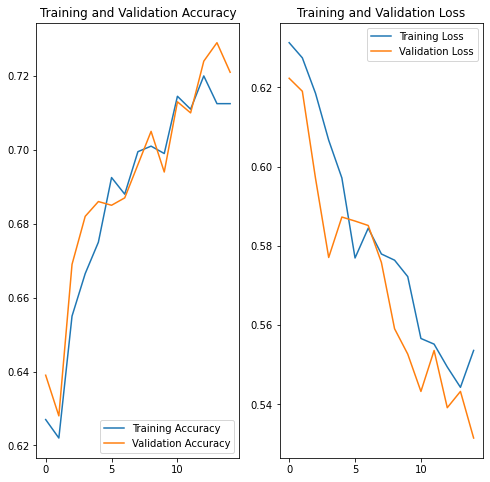

In [104]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 0s 180ms/step


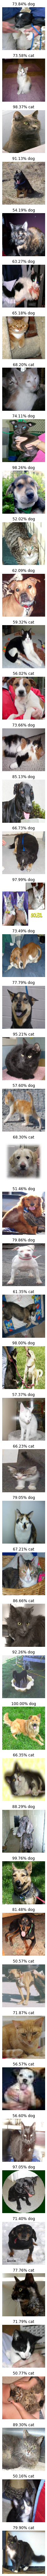

In [125]:
# 10
probabilities = model.predict(test_data_gen)
probabilities = probabilities.flatten()

plotImages(test_data_gen[0], probabilities)


In [126]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 70.0% of the images of cats and dogs.
You passed the challenge!
